# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

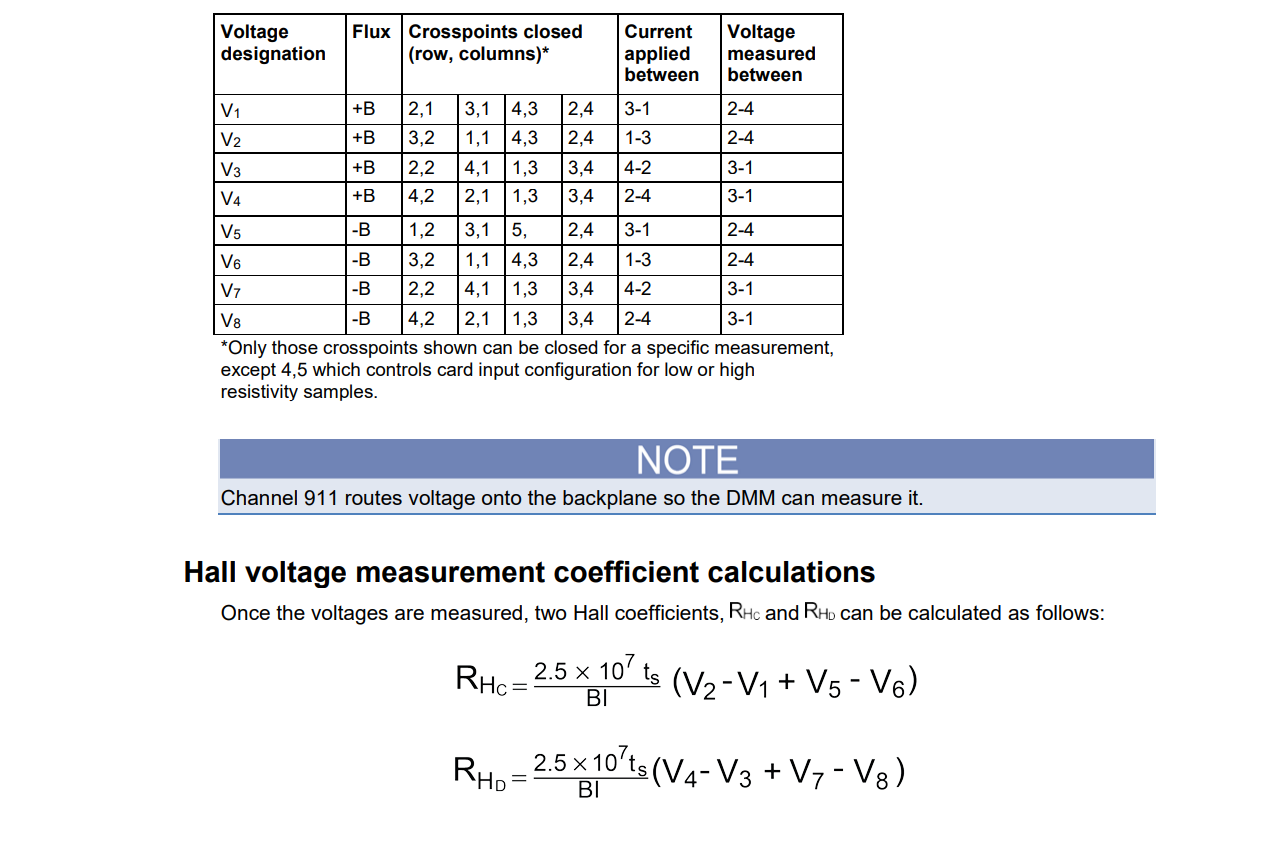

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
truncate = False # True it contains data from O to Bmax
path = r"C:\Users\Admin\Desktop\Analysis\Data\A302\HALL\Archive"
filename = 'A302_DSO_2p_to_2n_250K.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,20000.342578,250.000088,-106.469385,106.507831,106.403661,-106.343750,5.659000e-07,1000000.0
1,0.00002,19000.518066,249.999705,-106.510911,106.551401,106.426732,-106.402095,5.161000e-07,1000000.0
2,0.00002,18000.326562,250.000298,-106.507465,106.553149,106.424004,-106.371812,4.946000e-07,1000000.0
3,0.00002,17000.295020,250.000752,-106.511582,106.532833,106.445042,-106.412304,5.018000e-07,1000000.0
4,0.00002,16000.304639,250.000616,-106.509199,106.531916,106.428419,-106.408630,4.986000e-07,1000000.0
...,...,...,...,...,...,...,...,...,...
101,0.00002,16000.217480,249.999493,-106.507853,106.548341,106.423693,-106.396795,4.237000e-07,1000000.0
102,0.00002,17000.571387,250.000671,-106.507806,106.535518,106.415862,-106.379891,4.234000e-07,1000000.0
103,0.00002,18000.148340,250.000617,-106.516749,106.541594,106.407499,-106.379645,4.367000e-07,1000000.0
104,0.00002,19000.280762,250.000023,-106.508347,106.539646,106.407045,-106.395023,4.577000e-07,1000000.0


### Converting B to integer B

In [3]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [4]:
(df['V1'], df['V3']) = (df['V3'], df['V1'])
(df['V2'], df['V4']) = (df['V4'], df['V2'])
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,20000.342578,20000,250.000088,106.403661,-106.343750,-106.469385,106.507831,5.659000e-07,1000000.0
1,0.00002,19000.518066,19000,249.999705,106.426732,-106.402095,-106.510911,106.551401,5.161000e-07,1000000.0
2,0.00002,18000.326562,18000,250.000298,106.424004,-106.371812,-106.507465,106.553149,4.946000e-07,1000000.0
3,0.00002,17000.295020,17000,250.000752,106.445042,-106.412304,-106.511582,106.532833,5.018000e-07,1000000.0
4,0.00002,16000.304639,16000,250.000616,106.428419,-106.408630,-106.509199,106.531916,4.986000e-07,1000000.0


In [5]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

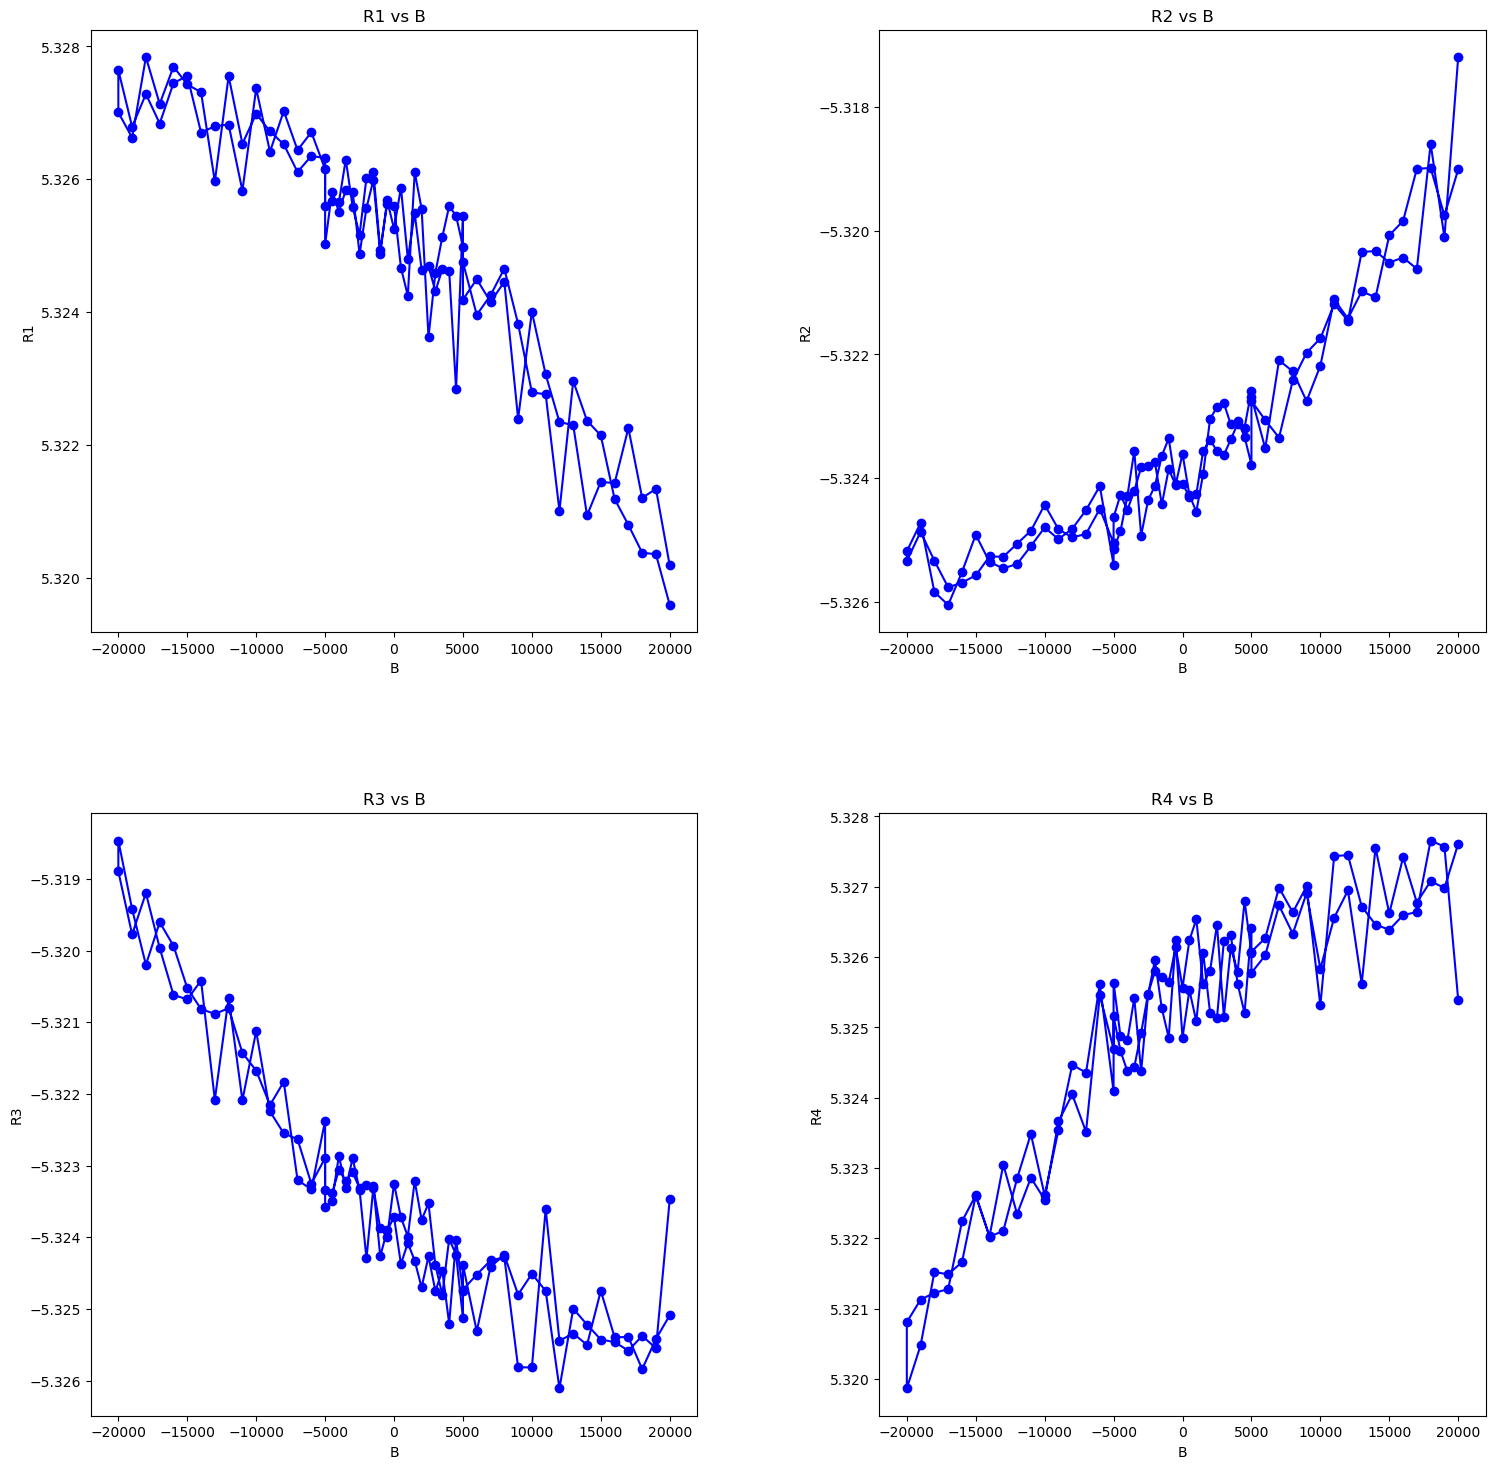

In [6]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [7]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [8]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

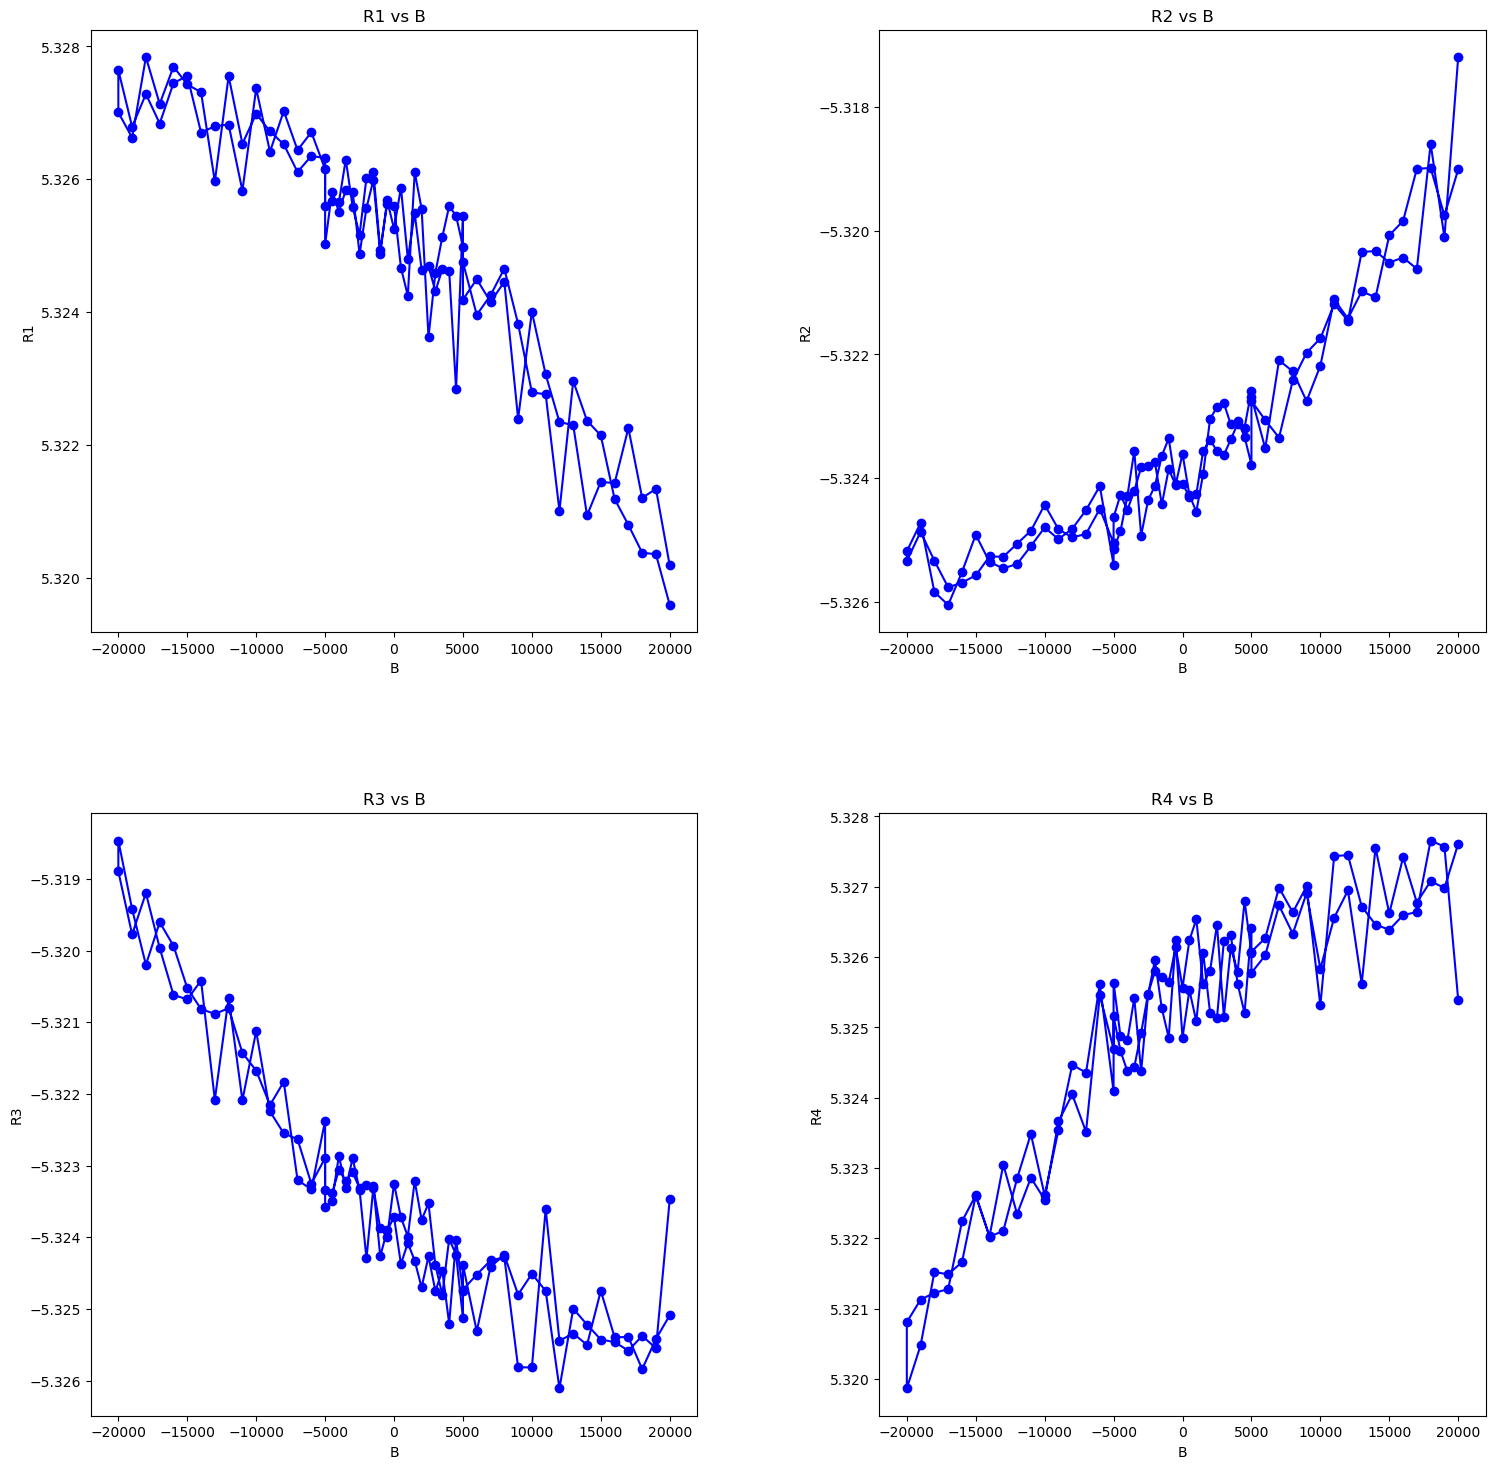

In [9]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [10]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

20000 -20000


In [11]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

52

In [12]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [13]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,20000.342578,20000,250.000088,106.403661,-106.343750,-106.469385,106.507831,5.659000e-07,1000000.0
1,0.00002,19000.518066,19000,249.999705,106.426732,-106.402095,-106.510911,106.551401,5.161000e-07,1000000.0
2,0.00002,18000.326562,18000,250.000298,106.424004,-106.371812,-106.507465,106.553149,4.946000e-07,1000000.0
3,0.00002,17000.295020,17000,250.000752,106.445042,-106.412304,-106.511582,106.532833,5.018000e-07,1000000.0
4,0.00002,16000.304639,16000,250.000616,106.428419,-106.408630,-106.509199,106.531916,4.986000e-07,1000000.0


In [14]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
53,0.00002,-20000.285742,-20000,250.001010,106.552878,-106.503729,-106.377927,106.397399,4.701000e-07,1000000.0
54,0.00002,-19000.413379,-19000,250.000646,106.535797,-106.494548,-106.395517,106.409630,4.645000e-07,1000000.0
55,0.00002,-18000.253125,-18000,250.000192,106.545655,-106.516924,-106.383954,106.430462,4.804000e-07,1000000.0
56,0.00002,-17000.199805,-17000,250.001282,106.536783,-106.521110,-106.399310,106.429821,4.840000e-07,1000000.0
57,0.00002,-16000.248975,-16000,250.000005,106.548948,-106.510494,-106.412371,106.433277,4.864000e-07,1000000.0


In [15]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [16]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00002,20000,250.000088,106.403661,-106.343750,-106.469385,106.507831,106.552878,-106.503729,-106.377927,106.397399,1000000.0
1,0.00002,19000,249.999705,106.426732,-106.402095,-106.510911,106.551401,106.535797,-106.494548,-106.395517,106.409630,1000000.0
2,0.00002,18000,250.000298,106.424004,-106.371812,-106.507465,106.553149,106.545655,-106.516924,-106.383954,106.430462,1000000.0
3,0.00002,17000,250.000752,106.445042,-106.412304,-106.511582,106.532833,106.536783,-106.521110,-106.399310,106.429821,1000000.0
4,0.00002,16000,250.000616,106.428419,-106.408630,-106.509199,106.531916,106.548948,-106.510494,-106.412371,106.433277,1000000.0


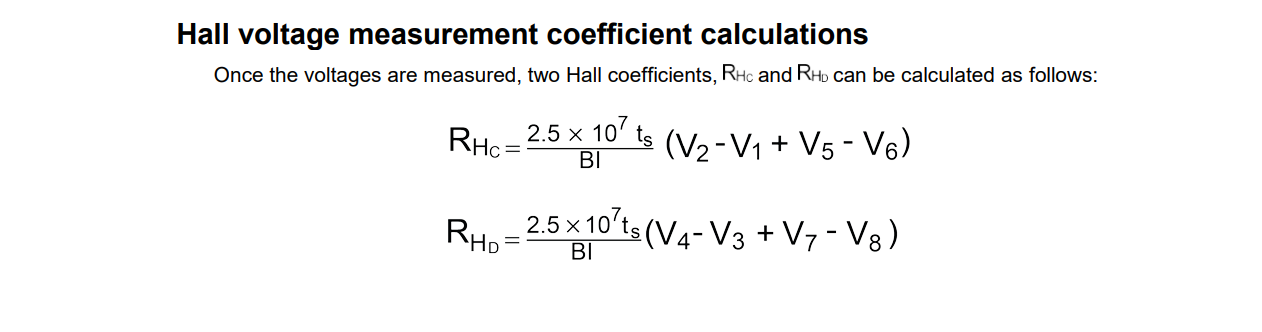
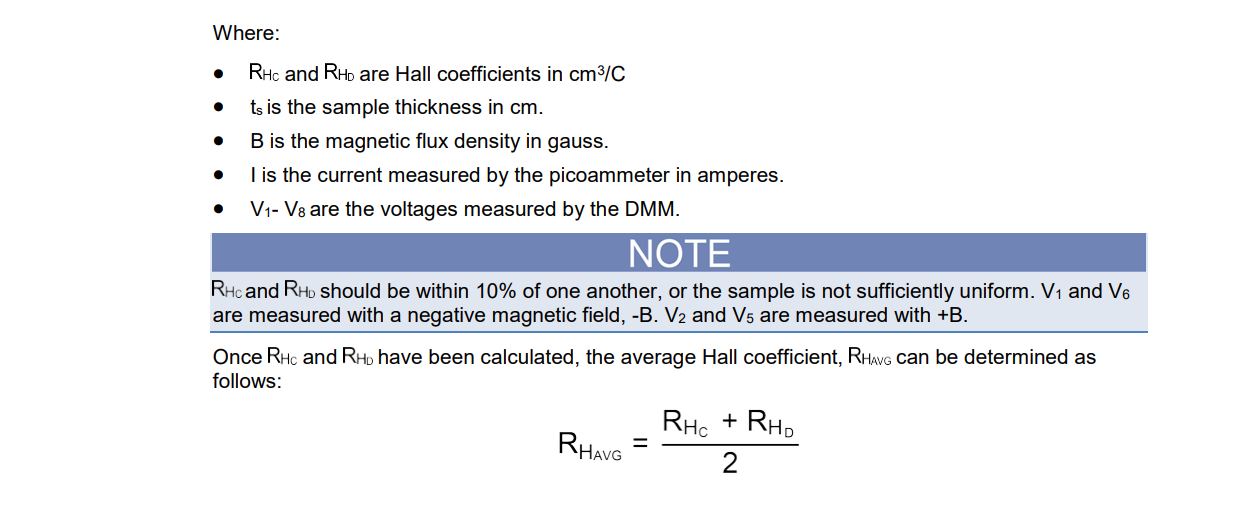

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [17]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

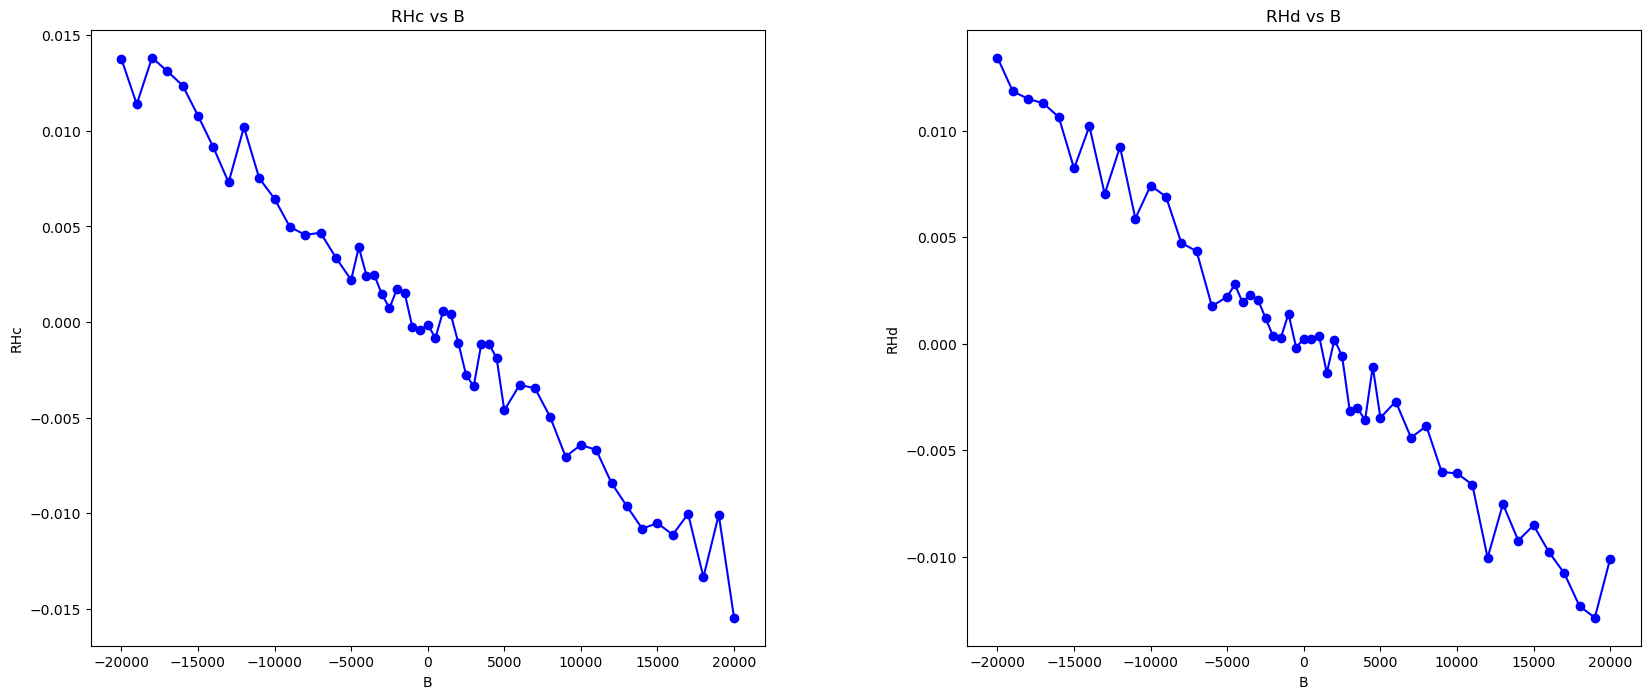

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

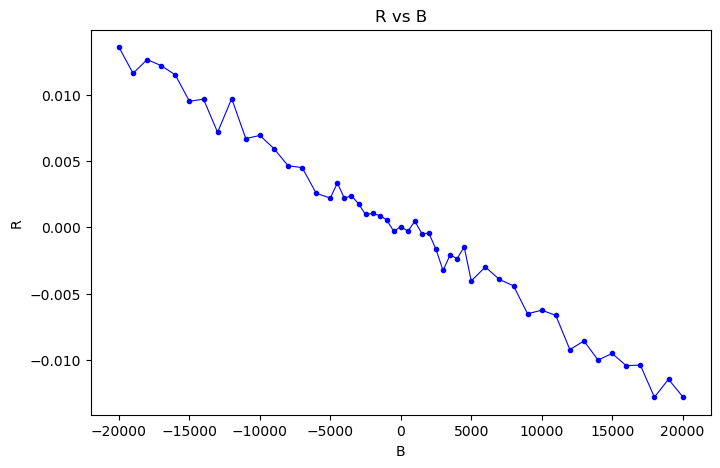

In [19]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [20]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00002,-20000,250.001010,106.552878,-106.503729,-106.377927,106.397399,106.403661,-106.343750,-106.469385,106.507831,1000000.0
1,0.00002,-19000,250.000646,106.535797,-106.494548,-106.395517,106.409630,106.426732,-106.402095,-106.510911,106.551401,1000000.0
2,0.00002,-18000,250.000192,106.545655,-106.516924,-106.383954,106.430462,106.424004,-106.371812,-106.507465,106.553149,1000000.0
3,0.00002,-17000,250.001282,106.536783,-106.521110,-106.399310,106.429821,106.445042,-106.412304,-106.511582,106.532833,1000000.0
4,0.00002,-16000,250.000005,106.548948,-106.510494,-106.412371,106.433277,106.428419,-106.408630,-106.509199,106.531916,1000000.0


### Hall resistance calculation

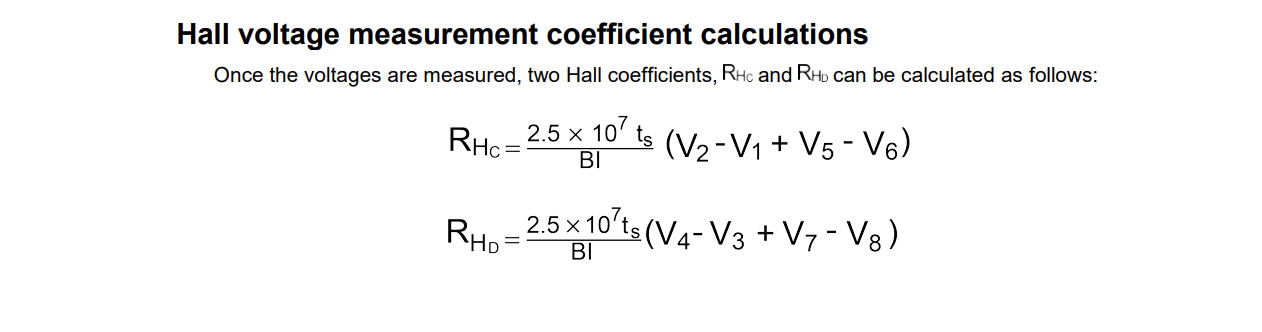

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [21]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

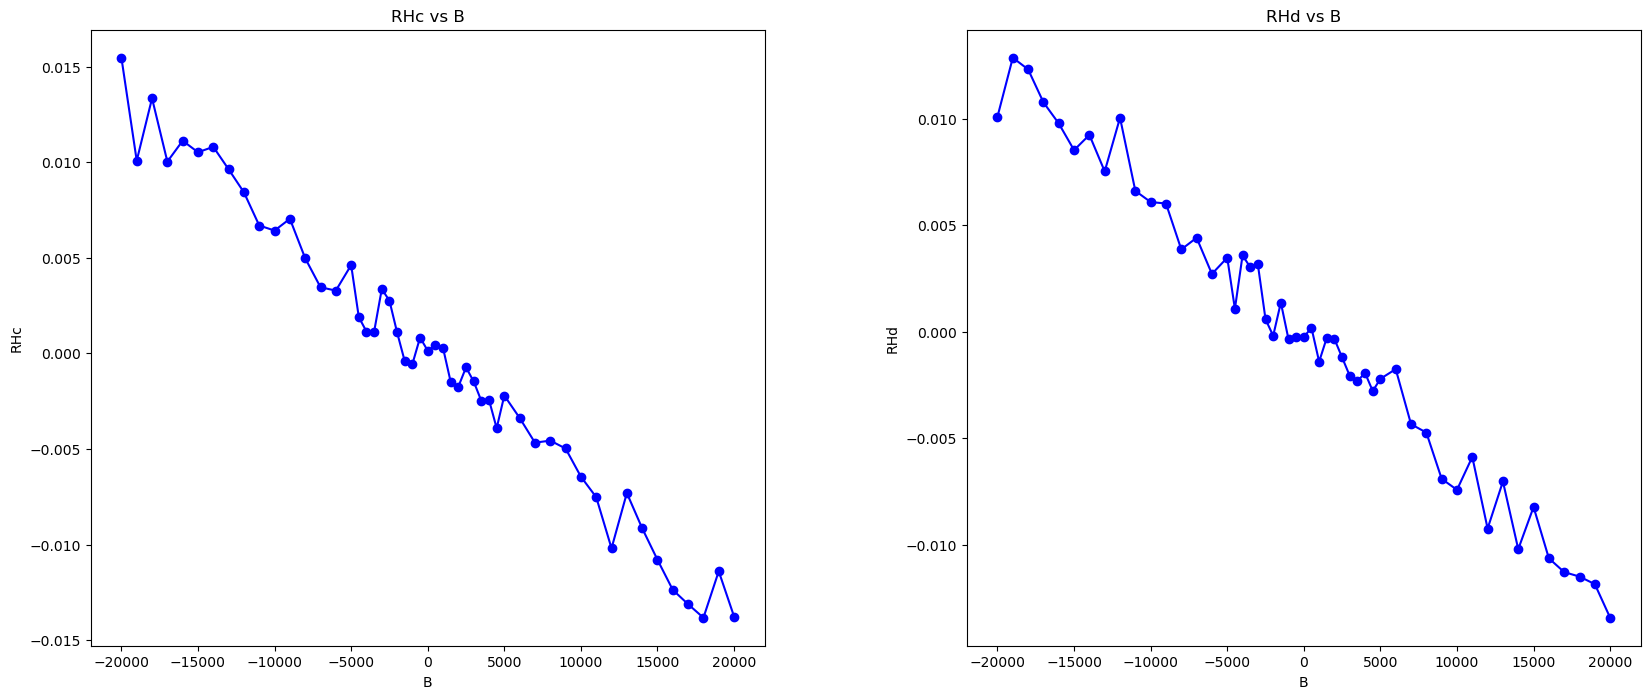

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

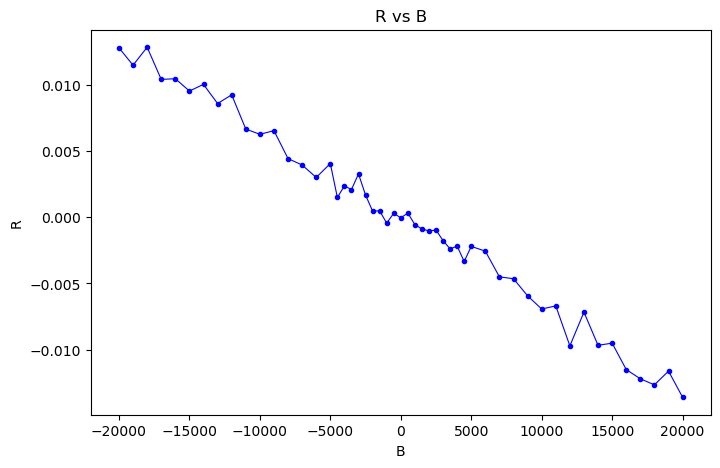

In [23]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

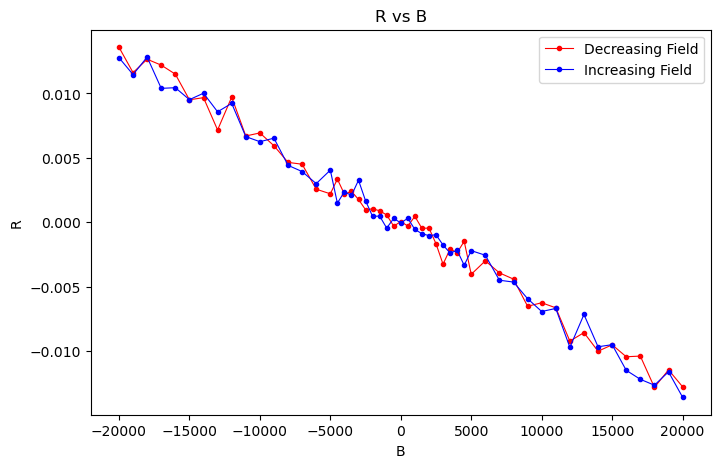

In [24]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [25]:
data = pd.concat([data_dec,data_inc])
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{filename}')